#Install, import libraries and call model from Drive

In [1]:
%%capture
!pip install ultralytics
from ultralytics import YOLO
from google.colab import drive, files
import matplotlib.pyplot as plt
import cv2
drive.mount('/content/drive')
model = YOLO('/content/drive/MyDrive/Prj_Intro_DL/yolo_model.pt')

#Upload image file and see result

Saving image-for-infer.jpg to image-for-infer.jpg


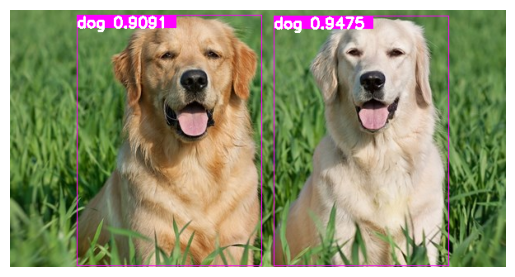

In [2]:
uploaded = files.upload()
filename = next(iter(uploaded))
path = '/content/' + filename
results = model.predict(path, imgsz=640, conf=0.5)
for r in results:
    cls = r.boxes.cls
    conf = r.boxes.conf
    xyxy = r.boxes.xyxy
def to_label(x):
    labels = ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle','bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']
    return labels[int(x)]
image = cv2.imread(path)
for i in range(len(cls)):
    label = to_label(cls[i])
    confidence = conf[i]
    [x_min, y_min, x_max, y_max] = [int(k) for k in xyxy[i]]
    width = len(str(label)+' '+str(conf[i])[7:-1]) * 12
    cv2.rectangle(image, (x_min, y_min + 15), (x_min + width, y_min), (255, 0, 255), -1)
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 255), 1)
    cv2.putText(image, str(label)+' '+str(conf[i])[7:-1], (x_min, y_min+15), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()